In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *
from LIMxCMBL.kernels import *
import matplotlib.pyplot as plt

In [2]:
nurest = cu.c/(21.106114054160 * u.cm)
Ofield = experiments['CHIME']['Omega_field']
dnu = (800 * u.MHz - 400 * u.MHz)/(256 * 4)

In [3]:
nuobs = np.linspace(617, 710,1000) * u.MHz
B = max(nuobs) - min(nuobs)
lobs = cu.c/nuobs
zobs = (nurest /nuobs - 1).si

In [4]:
Tsys = 55*u.K
Ssky = 31000 * u.deg**2

ttot = 1*u.yr
Nant = 256
npol = 2
Ncyl = 4
wcyl = 20*u.m
lcyl = 78*u.m

In [5]:
eta = 0.7
Ae = eta * lcyl/Nant * wcyl
Obeam = ((lobs**2/Ae)) * u.sr
du2 = (2*np.pi)**2/Obeam
du = np.sqrt(du2)

SFOV = (90*u.deg * (lobs/wcyl *(u.rad)))

In [6]:
bmin = 0.3048 * u.m
bmax = 102 * u.m
Db = (bmax - bmin)
umin = bmin / lobs * 1/u.rad
umax = bmax / lobs * 1/u.rad
Ndish = Nant * Ncyl

tp = ttot * SFOV / Ofield

In [7]:
n_u_z = Ndish * (Ndish - 1) / (2 * np.pi) / (umax**2 - umin**2)
N_dU = (n_u_z * du**2).si
print(N_dU[:10]) #independent of observing
N_dU_fid = N_dU[0]

N_u = ((umax-umin)/du).si

[2698.6195752 2698.6195752 2698.6195752 2698.6195752 2698.6195752
 2698.6195752 2698.6195752 2698.6195752 2698.6195752 2698.6195752]


In [8]:
tot_polar_bins = (np.pi*(umax**2-umin**2)/du**2).si 
#evaluate the sum in discrete case and pretends it holds in continous

In [9]:
((N_dU_fid  * tot_polar_bins)/(Ndish * (Ndish - 1)/2))
#total number of polar bins is consistent

<Quantity [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1.

In [10]:
PeT = (Tsys ** 2 
      / tp
      / dnu 
       / npol 
      / (N_dU_fid))

In [11]:
PeV = (PeT * Obeam**2 *
       (2 * cu.k_B * nuobs**2 / cu.c**2)**2 / u.sr**2).to(u.mJy**2)

In [12]:
PeI_dV = 1/(2*np.pi)**4 * np.pi * du**2 * (umax**2 - umin**2) * PeV

In [13]:
PeI = (PeI_dV 
       * dnu / nuobs 
       * nurest/nuobs 
       * Obeam/u.sr * Gamma_nu(nuobs, nurest)).to((u.kJy/u.sr)**2*u.Mpc**3)

In [14]:
PeI[499]

<Quantity 0.8319956 kJy2 Mpc3 / sr2>

In [224]:
u_f = u.Mpc**3 * (u.kJy/u.sr)**2

In [16]:
PeI_intuit = (
    (55 * u.K)**2 
    * 256
    /2
    /(4**2)
    *31000 * u.deg**2
    /(1*u.yr)
    *663*u.MHz
    *(1e4 * u.m**2)**2
    /(0.7)**3
    /(78*u.m)**3
    /(20*u.m)**2
    *32*u.Gpc**3 
    #after this its prefactors
    *0.63661977 #basically 1/90deg in rads
    *cu.c
    *nurest
    *(2*cu.k_B/cu.c**2/u.sr)**2
    /(2*np.pi)**2
    /u.sr
    /2 # fixed factor of two
).to(u_f)
print(PeI_intuit)
(PeI_intuit/PeI[499]).si

0.7647520931345883 kJy2 Mpc3 / sr2


<Quantity 0.91917805>

In [17]:
PeI_intuit.to(u_f)

<Quantity 0.76475209 kJy2 Mpc3 / sr2>

In [18]:
PeI_intuit2 = (
    (Tsys)**2 
    * Nant
    /npol
    /(Ncyl**2)
    *Ofield
    /ttot
    *nuobs
    *(bmax**2 - bmin**2)**2
    /(eta)**3
    /(lcyl)**3
    /(wcyl)**2
    *Gamma_nu(nuobs,nurest)
    #after this its prefactors
    *0.63661977 #mathematica, basically 1/90deg
    *cu.c
    *nurest
    *(2*cu.k_B/cu.c**2/u.sr)**2
    /(2*np.pi)**2
    /u.sr
    /2 #fixed factor of 2
).si#to((u.kJy/u.sr)**2 * u.Mpc**3)
((PeI_intuit2-PeI)/PeI).si

<Quantity [-0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -0.00097657, -0.00097657, -0.00097657, -0.00097657, -0.00097657,
           -

In [19]:
PeI_intuit2[499].to(u_f)

<Quantity 0.8311831 kJy2 Mpc3 / sr2>

In [20]:
PeI_intuit3 = (
    (Tsys/(55 * u.K))**2 
    * 256/Nant
    /(npol/2)
    /(Ncyl/4)**2
    *Ofield/(31000 * u.deg**2)
    /(ttot/(1*u.yr))
    *(nuobs/(663*u.MHz))
    *((bmax**2-bmin**2)/(1e4 * u.m**2))**2
    /(eta/0.7)**3
    /(lcyl/(78*u.m))**3
    /(wcyl/(20*u.m))**2
    *(Gamma_nu(nuobs,nurest)/(32*u.Gpc**3)) 
)*1.53 * u_f/2 #fix factor of 2

((PeI_intuit3-PeI)/PeI).si

<Quantity [-0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -0.00065272, -0.00065272, -0.00065272, -0.00065272, -0.00065272,
           -

In [21]:
PeI_intuit3[499].to(u_f)

<Quantity 0.83145254 kJy2 Mpc3 / sr2>

In [22]:
PeI[499]

<Quantity 0.8319956 kJy2 Mpc3 / sr2>

In [23]:
PeI_intuit3[499].to(u.Mpc**3 * (u.kJy/u.sr)**2)

<Quantity 0.83145254 kJy2 Mpc3 / sr2>

In [24]:
a,b = CHIME_Pei()

In [25]:
b/PeI

<Quantity [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1.

In [26]:
b[499]

<Quantity 0.8319956 kJy2 Mpc3 / sr2>

In [27]:
1.53 * u_f/2 #fix factor of 2

<Quantity 0.765 kJy2 Mpc3 / sr2>

In [28]:
#try and check inuitive more rigorouslyb

In [230]:
def check_scaling_CHIME_Pei(Ofield = experiments['CHIME']['Omega_field'], 
                            dnu = (800 * u.MHz - 400 * u.MHz)/(256 * 4),
                            nuobs = 663 * u.MHz,
                            Tsys = 55*u.K,
                            ttot = 1*u.yr,
                            Nant = 256,
                            npol = 2,
                            Ncyl = 4,
                            wcyl = 20*u.m,
                            lcyl = 78*u.m,
                            Ssky = 31000 * u.deg**2,
                            eta = 0.7,
                           DeltaB2= (102 * u.m)**2 - (0.3048 * u.m)**2):
    lobs = cu.c/nuobs
    zobs = (nurest /nuobs - 1).si

    
    
    

    Ae = eta * lcyl/Nant * wcyl
    Obeam = ((lobs**2/Ae)) * u.sr
    du2 = (2*np.pi)**2/Obeam
    du = np.sqrt(du2)
    
    SFOV = (90*u.deg * (lobs/wcyl *(u.rad)))
    
    Ndish = Nant * Ncyl
    
    tp = ttot * SFOV / Ofield
    
    n_u_z = Ndish * (Ndish - 1) / (2 * np.pi) / DeltaB2 * lobs**2 * u.sr
    N_dU = (n_u_z * du**2).si
    N_dU_fid = N_dU

    PeT = (Tsys ** 2 
          / tp
          / dnu 
           / npol 
          / (N_dU_fid))
    
    PeV = (PeT * Obeam**2 *
          (2 * cu.k_B * nuobs**2 / cu.c**2)**2 / u.sr**2).to(u.mJy**2)   

    PeI_dV = 1/(2*np.pi)**4 * np.pi * du**2 * DeltaB2 * PeV / lobs**2 / u.sr

    PeI = (PeI_dV 
           * dnu / nuobs 
           * nurest/nuobs 
           * Obeam/u.sr * Gamma_nu(nuobs, nurest)).to((u.kJy/u.sr)**2*u.Mpc**3)
    return PeI



In [236]:
102**2-0.3048**2

10403.90709696

In [237]:
fids = {
    'Tsys': 55,
    'Nant': 256,
    'npol': 2,
    'Ncyl': 4,
    'Ofield': experiments['CHIME']['Omega_field'].value,
    'ttot': 1,
    'eta': 0.7,
    'lcyl':78,
    'wcyl': 20,
    'DeltaB2': 10403.90709696,
}
fids_unit={
    'Tsys': u.K,
    'Nant': 1,
    'npol': 1,
    'Ncyl': 1,
    'Ofield':experiments['CHIME']['Omega_field'].unit,
    'ttot': u.yr,
    'eta': 1,
    'lcyl':u.m,
    'wcyl': u.m,
    'DeltaB2': u.m**2
}

scalings = {
    'Tsys': 2,
    'Nant': 1,
    'npol' : -1,
    'Ncyl':-2,
    'Ofield': 1,
    'ttot': -1,
    'eta': -3,
    'lcyl':-3,
    'wcyl': -2,
    'DeltaB2': 2,
}

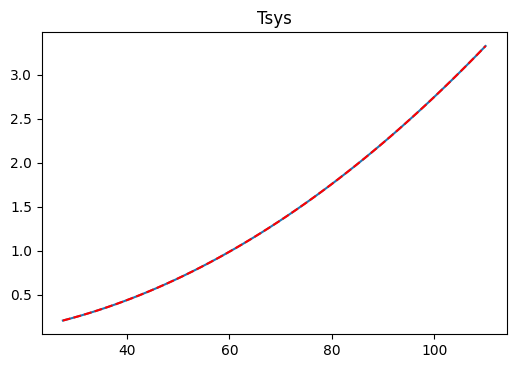

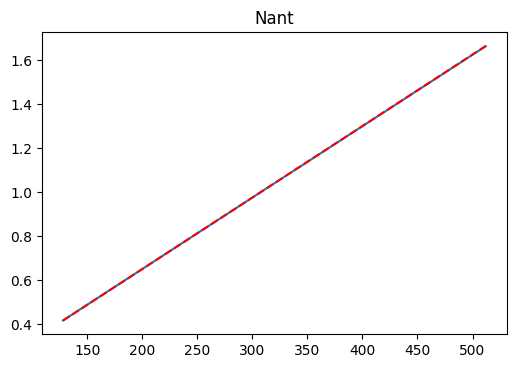

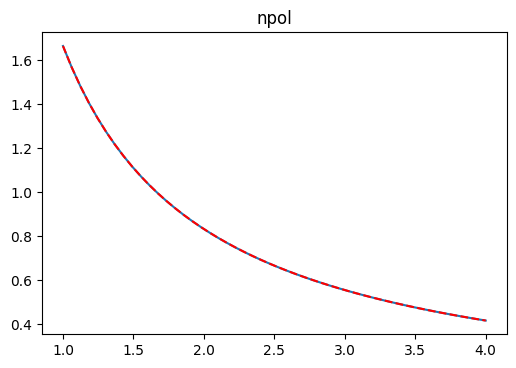

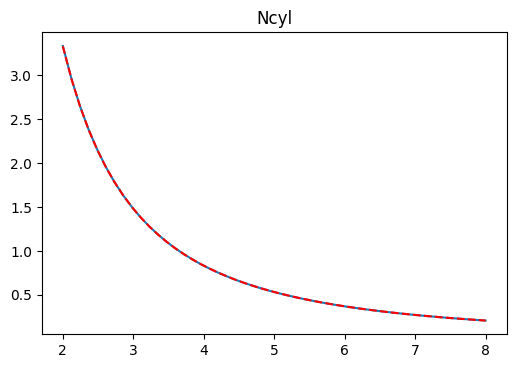

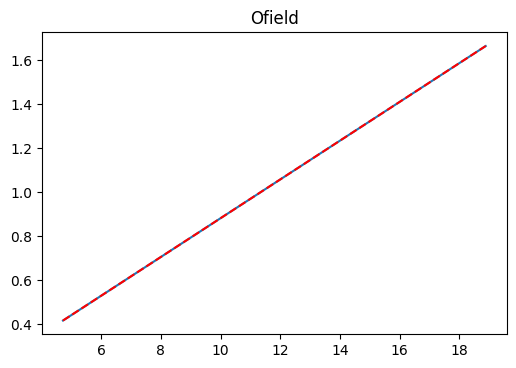

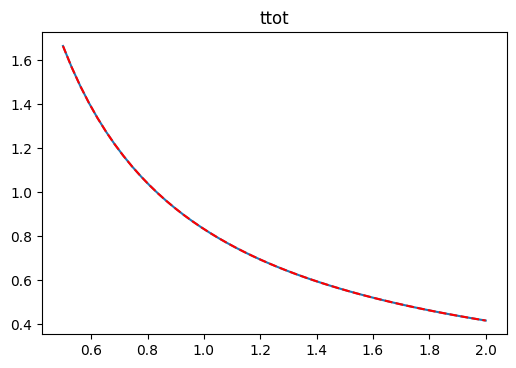

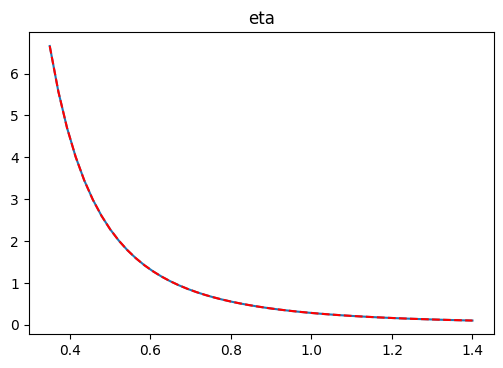

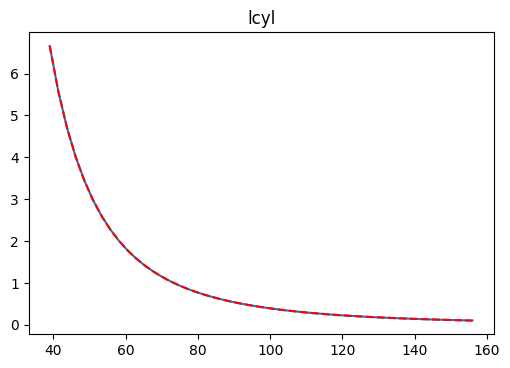

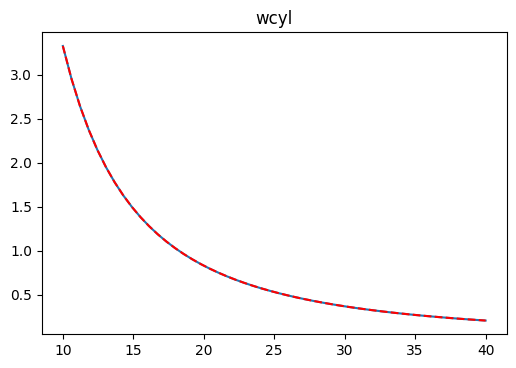

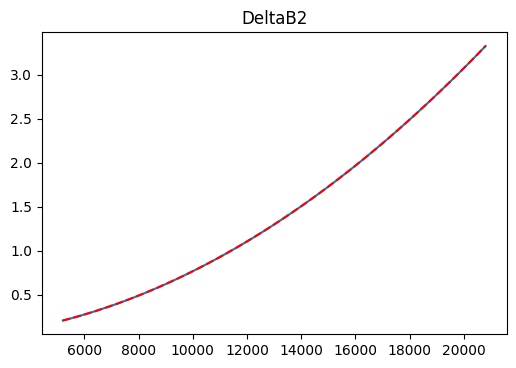

In [238]:
fid_Pei = (check_scaling_CHIME_Pei()/u_f).si
for _param in fids_unit:
    fid = fids[_param]
    scaling = scalings[_param]
    params = np.linspace(fid/2, fid*2) * fids_unit[_param]
    args = [{_param:p} for p in params]
    vals = [check_scaling_CHIME_Pei(**arg)/u_f for arg in args]
    plt.figure(dpi = 100)
    plt.title(_param)
    plt.plot(params, vals)
    plt.plot(params, fid_Pei*(params/(fid * fids_unit[_param]))**scaling, 'r--')
    plt.show()


In [239]:
Gamma_nu(663 * u.MHz, nurest).to(u.Gpc**3)

<Quantity 32.14033343 Gpc3>

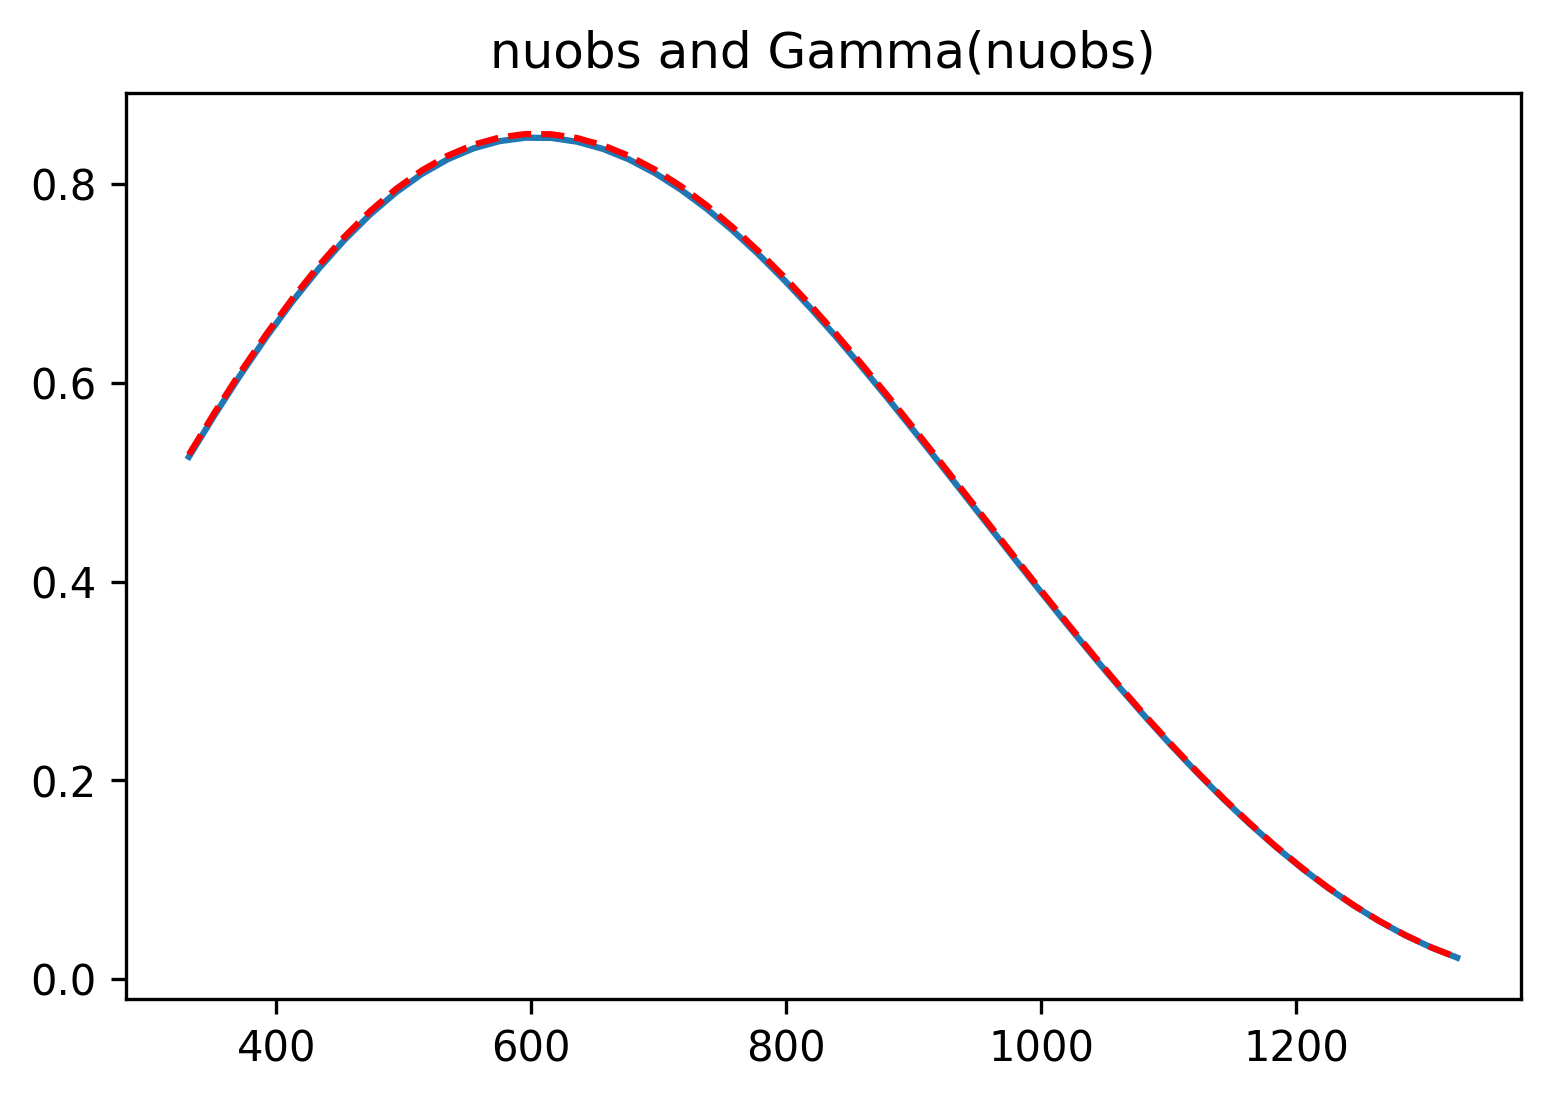

In [240]:
_param = 'nuobs'
fid = 663
nurest = cu.c/(21.106114054160 * u.cm)
params = np.linspace(fid/2, fid*2) * u.MHz
args = [{_param:p} for p in params]
vals = [check_scaling_CHIME_Pei(**arg)/u_f for arg in args]
plt.figure(dpi = 300)
plt.title('nuobs and Gamma(nuobs)')

asdf = vals
bsdf = (fid_Pei
         *(params/(663 * u.MHz)).si
         *(Gamma_nu(params, nurest=nurest)/(32 * u.Gpc**3)).si)
plt.plot(params, (asdf))
plt.plot(params, bsdf, 'r--')
plt.show()
